## Data Wrangling

### Introduction to the gaming industry

In 2021 the US spent \\$60.4bn USD. According to NDPs report, that was an increase of 8% year-over-year. Hardware sales saw more growth than software with console revenues up 14% from 2020*. However, in 2022 the industry saw a decrease of 5% compared to 2021 across all video game markets. North America was the second highest region spending \\$49.7bn which saw a decrease of 2.5% YOY*. According to NDPs video game market snapshot of 2022 spending, we can see the following: Hardware spending totaled \\$6.6 bn which entails a 8% growth YOY. Accessories spending reached \\$2.5bn falling 8% YOY. Content spending totaled \\$47.5 bn falling 7% YOY; however, subscription spending increase by 10%*. 




### Recap of problem

Overall the gaming industry keeps growing significantly and is forecasted to reach $206.4 bn globally in 2025*. For this analysis we will focus on games released in North America, which take up roughly 27 percent of the total global market (United States accounting for 24.8 percent), and games released worldwide. Lastly, the analysis will separate results by segment (mobile, console, PC, etc.) and look into game features (content, perspective, mode, etc.) of top ranked games that could potentially make them more popular than other games in similar genres. We will also analyze what consumer preferences drive a purchase/download decision between one game and another, and if the release month (summer/winter vacation over school time) has any influence on total revenue. 

## Import & Loading data 

In [1]:
#Import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#Load created CSV from API 
IGDB_raw = pd.read_csv('game_list.csv')

In [3]:
#Auditing the data 
IGDB_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5807 non-null   int64  
 1   id                       5807 non-null   int64  
 2   age_ratings              4550 non-null   object 
 3   category                 5807 non-null   int64  
 4   collection               3992 non-null   float64
 5   cover                    5783 non-null   float64
 6   created_at               5807 non-null   int64  
 7   external_games           5765 non-null   object 
 8   first_release_date       5737 non-null   float64
 9   follows                  3886 non-null   float64
 10  franchises               2061 non-null   object 
 11  game_modes               5618 non-null   object 
 12  genres                   5717 non-null   object 
 13  involved_companies       5637 non-null   object 
 14  keywords                

In [4]:
IGDB_raw.head()

,Unnamed: 0,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,...,dlcs,expansions,multiplayer_modes,expanded_games,hypes,parent_game,standalone_expansions,forks,version_parent,version_title
0,0,4454,[78403],0,4445.0,193026.0,1390775426,"[45614, 147371, 1190599]",8.169984e+08,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6843,"[18700, 65494]",0,941.0,78857.0,1400592957,"[51191, 145542, 402164, 1193557]",1.056586e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7995,[66005],0,3138.0,199764.0,1414716913,"[52206, 132934, 1746061, 1921468]",1.173571e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4221,[58455],0,687.0,161022.0,1390750383,"[51645, 143610, 1709454]",1.023062e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1341,"[4566, 34569, 94567, 94629, 123277, 131429]",0,361.0,123347.0,1348912750,"[14669, 76711, 95250, 142618, 188993, 216380, ...",1.068509e+09,157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Number of missing values by column 
missing = pd.concat([IGDB_raw.isnull().sum(), 100 * IGDB_raw.isnull().mean()], axis= 1)
missing.columns=["Total missing values", "%" ]
missing.sort_values(by=['Total missing values', '%'], ascending=False)

,Total missing values,%
forks,5796,99.810573
version_parent,5791,99.724470
version_title,5791,99.724470
standalone_expansions,5741,98.863441
status,5676,97.744102
expansions,5619,96.762528
remakes,5616,96.710866
expanded_games,5593,96.314792
remasters,5569,95.901498
dlcs,5540,95.402101


In [7]:
# Dropping all columns with more than 60% missing values. 
IGDB_df = IGDB_raw.dropna(thresh=IGDB_raw.shape[0]*0.6,how='all',axis=1)

In [10]:
#Check point 
# Number of missing values by column 
missing = pd.concat([IGDB_df.isnull().sum(), 100 * IGDB_df.isnull().mean()], axis= 1)
missing.columns=["Total missing values", "%" ]
missing.sort_values(by=['Total missing values', '%'], ascending=False)

,Total missing values,%
rating,1988,34.234545
rating_count,1988,34.234545
follows,1921,33.080765
collection,1815,31.255381
total_rating,1542,26.554159
total_rating_count,1542,26.554159
age_ratings,1257,21.646289
screenshots,1040,17.909420
themes,904,15.567419
player_perspectives,900,15.498536


In [11]:
# Unique values 
IGDB_df[['name', 'id']].nunique()

name    5775
id      5807
dtype: int64

In [42]:
# More ids than names indicates possible game remakes or sequels 
IGDB_df['name'].value_counts().head(30)

Perfect Dark                    3
NBA Jam                         3
Gauntlet                        3
Shadowrun                       2
Medal of Honor                  2
Sonic the Hedgehog              2
Bomberman                       2
Pac-Man                         2
Custom Robo                     2
SimCity                         2
Final Fantasy II                2
Mighty Morphin Power Rangers    2
Barbie                          2
Final Fantasy VII               2
Bionic Commando                 2
Mega Man                        2
Shadow Warrior                  2
Mortal Kombat                   2
Metal Gear Solid                2
Syndicate                       2
Alone in the Dark               2
SSX                             2
La-Mulana                       2
Command & Conquer               2
Blood Bowl                      2
FIFA Street                     2
Ninja Gaiden                    2
Judge Dredd                     2
GoldenEye 007                   2
Kingdom Rush F

In [46]:
IGDB_df['id'].value_counts().head()

4454    1
4815    1
3613    1
5968    1
1187    1
Name: id, dtype: int64

In [48]:
# Games with ratings higher than 50 
counts = IGDB_df['rating'].value_counts(dropna=False) 
valids = counts[counts>50].index

IGDB_df[IGDB_df['rating'].isin(valids)]

,Unnamed: 0,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,...,tags,themes,updated_at,url,websites,checksum,total_rating,total_rating_count,rating,rating_count
0,0,4454,[78403],0,4445.0,193026.0,1390775426,"[45614, 147371, 1190599]",8.169984e+08,2.0,...,"[1, 268435487, 268435489, 536872237, 536875074...",[1],1692923424,https://www.igdb.com/games/spot-goes-to-hollywood,"[180635, 347636]",45f20fba-d424-2d65-6119-33151af150c7,NaN,NaN,NaN,NaN
1,1,6843,"[18700, 65494]",0,941.0,78857.0,1400592957,"[51191, 145542, 402164, 1193557]",1.056586e+09,NaN,...,"[39, 268435460, 268435468, 268435471, 26843547...",[39],1693916338,https://www.igdb.com/games/dynasty-tactics-2,"[349717, 536714, 536715]",9f3e3b82-8299-10a4-b154-d9b31c300617,NaN,NaN,NaN,NaN
2,2,7995,[66005],0,3138.0,199764.0,1414716913,"[52206, 132934, 1746061, 1921468]",1.173571e+09,NaN,...,"[1, 268435464, 536871602, 536873299]",[1],1693874906,https://www.igdb.com/games/el-tigre-the-advent...,"[254124, 395703]",a17db3a2-98e7-fff0-1310-2dd6cd7f21d7,65.0,1.0,NaN,NaN
3,3,4221,[58455],0,687.0,161022.0,1390750383,"[51645, 143610, 1709454]",1.023062e+09,NaN,...,"[268435460, 268435470, 268435481, 536870973, 5...",NaN,1691462902,https://www.igdb.com/games/ufc-throwdown,[352322],0495aef1-a71b-9630-181f-bf0674876f2a,60.0,2.0,NaN,NaN
5,5,4967,"[66179, 66256]",0,NaN,329337.0,1391651125,"[35778, 128039, 247067]",1.177978e+09,NaN,...,"[1, 268435460, 536870973, 536871909, 536872352...",[1],1694393987,https://www.igdb.com/games/legend-of-the-dragon,[334269],e4c37e48-ce6e-2c17-b45a-de60b59cd9c3,30.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,5800,3555,NaN,0,4077.0,135470.0,1389128958,"[28726, 134949, 1191320]",9.302688e+08,NaN,...,"[1, 18, 268435460, 536870990, 536871079, 53687...","[1, 18]",1695176850,https://www.igdb.com/games/neon-genesis-evange...,"[180847, 348120]",a5d90b48-ec3b-7f3e-6361-0feb57aad88d,NaN,NaN,NaN,NaN
5802,5802,4283,"[2324, 138406]",0,4924.0,185382.0,1390761793,"[16116, 140198, 187707, 249078, 2068670]",7.572960e+08,2.0,...,"[1, 18, 268435466, 536870937, 536871015, 53687...","[1, 18]",1692708978,https://www.igdb.com/games/megarace,"[125670, 125671, 336226]",535bf690-a6cf-7fd1-60a7-7e292bf7a3bb,NaN,NaN,NaN,NaN
5803,5803,8162,[5107],0,1854.0,290514.0,1415324871,"[49964, 127970, 1922153]",1.078099e+09,NaN,...,"[1, 268435461, 536872390, 536875054, 536876836]",[1],1690962725,https://www.igdb.com/games/extreme-ghostbuster...,[396332],3872579f-b985-64af-948a-3284ce232002,NaN,NaN,NaN,NaN
5804,5804,9345,[78451],0,1094.0,310784.0,1427923369,"[49782, 73680, 153863, 248595]",9.792576e+08,NaN,...,"[1, 39, 268435461, 268435480, 536870913, 53687...","[1, 39]",1691664554,https://www.igdb.com/games/spec-ops-ranger-elite,[335754],b409bf3d-c8e4-4117-b9a6-2ceb9550526f,NaN,NaN,NaN,NaN


In [50]:
# Games with ratings lower than 50 
counts = IGDB_df['rating'].value_counts(dropna=False) 
valids = counts[counts<50].index

IGDB_df[IGDB_df['rating'].isin(valids)]

,Unnamed: 0,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,...,tags,themes,updated_at,url,websites,checksum,total_rating,total_rating_count,rating,rating_count
4,4,1341,"[4566, 34569, 94567, 94629, 123277, 131429]",0,361.0,123347.0,1348912750,"[14669, 76711, 95250, 142618, 188993, 216380, ...",1.068509e+09,157.0,...,"[1, 18, 23, 38, 268435461, 268435465, 26843548...","[1, 18, 23, 38]",1695301244,https://www.igdb.com/games/beyond-good-evil,"[16063, 16064, 16065, 67018, 118608, 313757, 5...",df73e0a4-35da-fbf1-1d81-b8a1d7c831d0,88.434158,309.0,86.268316,303.0
8,8,1185,"[7927, 30269]",0,268.0,239961.0,1341705832,"[48948, 79267, 150305, 189835, 245608]",8.422272e+08,141.0,...,"[1, 18, 268435464, 536871306, 536871470, 53687...","[1, 18]",1695176780,https://www.igdb.com/games/crash-bandicoot,"[98482, 522517]",b8cb3811-47f3-76a3-6506-81bf5e0a08c1,77.872352,529.0,80.744704,528.0
10,10,180,"[5861, 36579]",0,NaN,141217.0,1300188110,"[137809, 188970, 1918777]",7.992000e+08,49.0,...,"[18, 27, 268435458, 268435465, 268435487, 5368...","[18, 27]",1694043897,https://www.igdb.com/games/full-throttle,[393070],83a1ae23-4c47-c073-6c9e-a8c6b27ea55c,85.128874,140.0,83.257748,139.0
11,11,1881,"[31871, 44361, 74569]",0,117.0,94416.0,1358621353,"[13380, 39715, 81127, 124909, 245112]",1.378944e+09,48.0,...,"[1, 33, 38, 39, 268435461, 268435469, 26843547...","[1, 33, 38, 39]",1694512284,https://www.igdb.com/games/arma-3,"[16712, 16713, 16715, 16716, 52000, 288266, 28...",6fefd755-eb31-c27c-97fa-ac43ddb87452,74.393932,99.0,75.987865,92.0
12,12,4650,[48386],0,195.0,185455.0,1390984470,"[56042, 81701, 128672, 213987, 246417, 403208,...",1.285805e+09,16.0,...,"[32, 268435469, 268435470, 536870938]",[32],1692176111,https://www.igdb.com/games/pro-evolution-socce...,"[1158, 179565, 333642]",fce1069a-a376-25af-b3a8-70c176412a4f,74.645542,80.0,74.624418,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,5793,2688,"[12968, 44350, 47188, 116915, 116916, 116917, ...",0,521.0,182144.0,1374420740,"[35738, 137873, 215968, 246869, 1932176, 19322...",1.226794e+09,9.0,...,"[33, 38, 268435469, 536870955, 536871186, 5368...","[33, 38]",1694221863,https://www.igdb.com/games/animal-crossing-cit...,"[5685, 51065, 51066, 512992]",015f28d4-a000-b315-c806-28e6e6af4e44,73.774379,66.0,77.948757,59.0
5796,5796,2178,"[12650, 36305, 47134, 80726, 96235]",0,6124.0,95671.0,1372169682,"[35547, 72897, 132732, 189635, 219233, 245451,...",1.257984e+09,71.0,...,"[1, 27, 268435464, 268435487, 536870999, 53687...","[1, 27]",1692775546,https://www.igdb.com/games/new-super-mario-bro...,"[567, 36856, 36857, 332715]",a4e36bf3-7f4a-675b-f9a9-1bfeb99ce245,81.891527,257.0,82.533054,251.0
5797,5797,1665,[78989],0,6845.0,280604.0,1351448362,"[18891, 136634, 1921006]",8.151840e+08,2.0,...,"[1, 18, 268435461, 268435489, 536871078, 53687...","[1, 18]",1685513750,https://www.igdb.com/games/donpachi,"[126498, 395256]",94c7f9aa-7e6b-8697-0996-fece3a98d3c9,84.005286,7.0,84.005286,7.0
5801,5801,2391,NaN,0,2142.0,232992.0,1372862273,"[19503, 153373, 1192382]",3.428352e+08,1.0,...,"[1, 18, 268435461, 268435469, 536870979, 53687...","[1, 18]",1693487794,https://www.igdb.com/games/berzerk,"[95938, 95939, 348888]",52647d4e-5542-3e92-b490-d027568f8155,71.131393,17.0,72.262786,16.0


In [55]:
#Setting id as index 
IGDB_df.set_index('id', inplace=True)

In [56]:
IGDB_df.select_dtypes('float64')

,collection,cover,first_release_date,follows,total_rating,total_rating_count,rating,rating_count
id,,,,,,,,
4454,4445.0,193026.0,8.169984e+08,2.0,NaN,NaN,NaN,NaN
6843,941.0,78857.0,1.056586e+09,NaN,NaN,NaN,NaN,NaN
7995,3138.0,199764.0,1.173571e+09,NaN,65.000000,1.0,NaN,NaN
4221,687.0,161022.0,1.023062e+09,NaN,60.000000,2.0,NaN,NaN
1341,361.0,123347.0,1.068509e+09,157.0,88.434158,309.0,86.268316,303.0
...,...,...,...,...,...,...,...,...
4283,4924.0,185382.0,7.572960e+08,2.0,NaN,NaN,NaN,NaN
8162,1854.0,290514.0,1.078099e+09,NaN,NaN,NaN,NaN,NaN
9345,1094.0,310784.0,9.792576e+08,NaN,NaN,NaN,NaN,NaN


In [57]:
IGDB_df.select_dtypes('int64')

,Unnamed: 0,category,created_at,updated_at
id,,,,
4454,0,0,1390775426,1692923424
6843,1,0,1400592957,1693916338
7995,2,0,1414716913,1693874906
4221,3,0,1390750383,1691462902
1341,4,0,1348912750,1695301244
...,...,...,...,...
4283,5802,0,1390761793,1692708978
8162,5803,0,1415324871,1690962725
9345,5804,0,1427923369,1691664554


In [59]:
IGDB_df.columns

Index(['Unnamed: 0', 'age_ratings', 'category', 'collection', 'cover',
       'created_at', 'external_games', 'first_release_date', 'follows',
       'game_modes', 'genres', 'involved_companies', 'keywords', 'name',
       'platforms', 'player_perspectives', 'release_dates', 'screenshots',
       'similar_games', 'slug', 'summary', 'tags', 'themes', 'updated_at',
       'url', 'websites', 'checksum', 'total_rating', 'total_rating_count',
       'rating', 'rating_count'],
      dtype='object')

In [62]:
IGDB_df = IGDB_df.drop(['Unnamed: 0'], axis=1)

In [63]:
IGDB_df.columns

Index(['age_ratings', 'category', 'collection', 'cover', 'created_at',
       'external_games', 'first_release_date', 'follows', 'game_modes',
       'genres', 'involved_companies', 'keywords', 'name', 'platforms',
       'player_perspectives', 'release_dates', 'screenshots', 'similar_games',
       'slug', 'summary', 'tags', 'themes', 'updated_at', 'url', 'websites',
       'checksum', 'total_rating', 'total_rating_count', 'rating',
       'rating_count'],
      dtype='object')

In [72]:
IGDB_df.describe().T

,count,mean,std,min,25%,50%,75%,max
category,5807.0,4.275874e-01,1.806393e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
collection,3992.0,1.752182e+03,1.946472e+03,1.000000e+00,3.305000e+02,8.870000e+02,2.907000e+03,8.956000e+03
cover,5783.0,1.376778e+05,8.742905e+04,8.000000e+00,8.773750e+04,1.175090e+05,1.964500e+05,3.306890e+05
created_at,5807.0,1.385995e+09,3.343666e+07,1.297562e+09,1.373368e+09,1.391705e+09,1.406009e+09,1.430336e+09
first_release_date,5737.0,1.070772e+09,2.638634e+08,-8.035200e+06,9.024480e+08,1.109808e+09,1.282608e+09,1.735603e+09
follows,3886.0,2.510937e+01,7.986531e+01,1.000000e+00,2.000000e+00,4.000000e+00,1.500000e+01,1.798000e+03
updated_at,5807.0,1.690681e+09,7.338052e+06,1.441385e+09,1.688001e+09,1.692874e+09,1.694284e+09,1.695305e+09
total_rating,4265.0,6.913875e+01,1.423295e+01,8.000000e+00,6.144133e+01,7.177200e+01,7.950000e+01,1.000000e+02
total_rating_count,4265.0,6.966237e+01,2.055234e+02,0.000000e+00,5.000000e+00,1.500000e+01,4.600000e+01,4.011000e+03
rating,3819.0,7.033514e+01,1.336204e+01,1.017758e+01,6.413101e+01,7.259272e+01,7.989474e+01,1.000000e+02


In [73]:
missing_rating = IGDB_df[['total_rating', 'rating']].isnull().sum(axis=1)
missing_rating.value_counts()/len(missing_rating) * 100

0    65.765455
2    26.554159
1     7.680386
dtype: float64

Almost \\66% of games have no missing rating and total rating. Almost \\8% are missing one value. About \\26.5% are missing both. We will drop records that are missing both once we review distributions and deatures of that \\26.5%

In [67]:
#Check the platform column
IGDB_df['platforms']

id
4454           [7, 19, 29, 32]
6843                    [8, 9]
7995                    [5, 8]
4221                   [8, 21]
1341            [6, 8, 11, 21]
                 ...          
4283    [3, 6, 13, 14, 50, 78]
8162                       [7]
9345                    [7, 9]
1097                      [21]
5859                [6, 8, 11]
Name: platforms, Length: 5807, dtype: object

Single games can be played in multiple platforms. 

In [64]:
ratings_by_platform = IGDB_df.groupby('platforms')[['total_rating', 'rating']].mean()
ratings_by_platform.head()

,total_rating,rating
platforms,,
"[11, 12, 21]",69.087881,66.509095
"[11, 12]",56.293076,55.919485
"[11, 21]",42.846336,42.846336
"[11, 23]",NaN,NaN
"[11, 24]",NaN,NaN


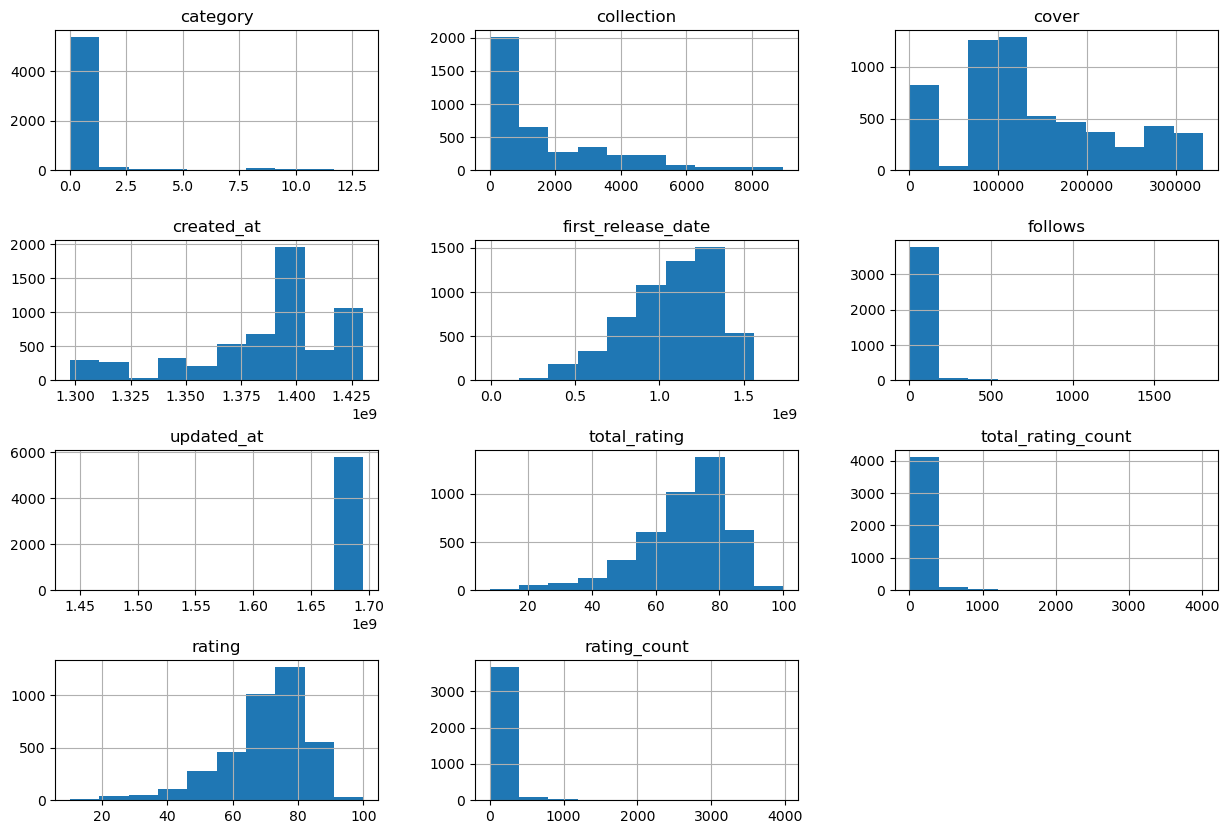

In [75]:
IGDB_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

What features do we have possible cause for concern about and why?

* Follows because values are clustered down the low end,
* Total_rating_count and rating_count for the same reason,

In [83]:
IGDB_df.follows[IGDB_df.follows > 1000].count()

3

In [78]:
IGDB_df.follows[IGDB_df.follows == 0].count()

0

In [94]:
IGDB_df.total_rating_count[IGDB_df.total_rating_count > 3000]

id
72      3055.0
1020    4011.0
1942    3561.0
Name: total_rating_count, dtype: float64

In [95]:
IGDB_df.rating_count[IGDB_df.rating_count > 3000]

id
72      3042.0
1020    3974.0
1942    3535.0
Name: rating_count, dtype: float64

In [82]:
IGDB_df[IGDB_df.total_rating_count > 4000].T

id,1020
age_ratings,"[45948, 47891, 47892, 47893, 47894, 47895, 111..."
category,0
collection,847.0
cover,120937.0
created_at,1326127365
external_games,"[11827, 62562, 74600, 79999, 80000, 85133, 936..."
first_release_date,1379376000.0
follows,1798.0
game_modes,"[1, 2, 3]"
genres,"[5, 10, 31]"


In [85]:
#dropping rows that have no rating data 
IGDB_df = IGDB_df[missing_rating != 2]

In [86]:
missing_rating_update = IGDB_df[['total_rating', 'rating']].isnull().sum(axis=1)
missing_rating_update.value_counts()/len(missing_rating_update) * 100

0    89.54279
1    10.45721
dtype: float64

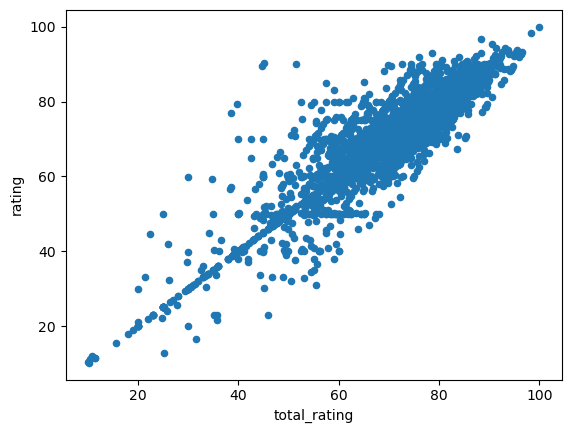

In [87]:
IGDB_df.plot(x='total_rating', y='rating', kind='scatter');

In [89]:
IGDB_df[['total_rating', 'rating']].isnull().sum()

total_rating      0
rating          446
dtype: int64

Total rating is the average rating based on both IGDB users and external critic score. Given that we have zero missint total rating values we will drop the rating and only keep the rows that have total_rating. 

In [90]:
IGDB_df.drop(columns='rating', inplace=True)
IGDB_df.dropna(subset=['total_rating'], inplace=True)

In [91]:
IGDB_df.shape

(4265, 29)

In [93]:
IGDB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4265 entries, 7995 to 1097
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_ratings          3715 non-null   object 
 1   category             4265 non-null   int64  
 2   collection           3153 non-null   float64
 3   cover                4263 non-null   float64
 4   created_at           4265 non-null   int64  
 5   external_games       4245 non-null   object 
 6   first_release_date   4261 non-null   float64
 7   follows              3462 non-null   float64
 8   game_modes           4223 non-null   object 
 9   genres               4243 non-null   object 
 10  involved_companies   4232 non-null   object 
 11  keywords             4046 non-null   object 
 12  name                 4265 non-null   object 
 13  platforms            4264 non-null   object 
 14  player_perspectives  3789 non-null   object 
 15  release_dates        4264 non-null   obj

In [96]:
IGDB_df.to_csv('IGDB_cleaned.csv')

### Summary 

-The original CSV data file provided 5807 rows and 58 columns. From the start it was visible that some information was missing in a significant number of columns. 

-After diving deeper into the percentage of missing values per column, we found that 26 columns had over 60% missing values. All columns with over 60% missing values were dropped to prevent incorrect modeling. 

-While verifying for duplicate games, we found that 32 games were duplicate in name but not in id. After further research, these names were repeated due to them been sequels or remakes, game id for each was different therefore id is being used as index for the df. 

-Looking into range of rating for different games, 2337 games have a rating higher than 50. 3470 games have a rating below 50. 

-Some concerns were perceived while looking at distributions of feature values, these included: 
        Follows has values clustered down the low end, with only 3 values above 1000 follows. 
        Total_rating_count and rating_count also clustered on the low end with just 3 games with over 3000 total_rating_count with 1 having over 4000 (GTA5 which is an extremely popular game)

-Total rating and rating were checked to verify which feature will be used for modeling. Total rating is the average rating based on both IGDB users and external critic scores while rating is the average of IGDB user ratings. After data cleanup it was determined that total_rating presented less missing values while also being significatly aligned with rating. Thus, total_rating substituted rating and will be used as our feature for analysis. 

-Lastly, cleaned data was saved with an updated count of 4265 rows and 29 columns. 